# Assignment 4

The eczema medical trial data set.



|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |

### Assumptions:

In a non-hierarchical model, we assume that this 6 different trials has the same fixed probability of success. We know that the priors over theta is uniform. Based on these information we have a model where the posterior for the control group is $\text{Beta}(\theta_c\,|\,58, 65)$.


We can use the posterior predictive checks for model checking. An example for the test statistics that we can use is the standart deviation as an indicator for how much the width of two distibution varies.

In [ ]:
#importing the necessary library

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

The test statistics for the original dataset:  0.22780767635314217
The mean of test statistic from 2000 samples:  0.11802503999611318
P-value:  0.0045


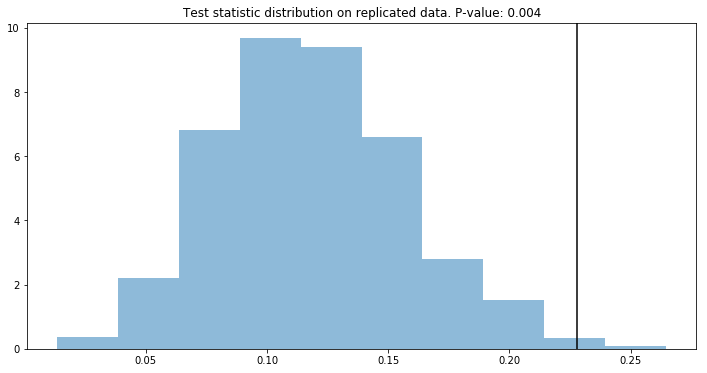

In [39]:
#Defining the size of the each control group and the number of success at each group
control_size = [15, 18, 10, 39, 29, 10]
control_success = [9, 11, 4, 21, 12, 0]
control_probability = np.divide(control_success,control_size)
control_fail = np.subtract(control_size, control_success)

#Since I want to use the standart deviation as the test statistic 
#I will define the test_statitic as sigma
def test_statistic(data):
    #setting ddof=1 to geth the unbiased estimator of the variance
    sigma = np.std(data, ddof=1) 
    return sigma

#posterior samples based on the posterior for control group
posterior_samples_control = sts.beta(58,65).rvs(2000)

#Since we would like to replicate original dataset, we would like to have 6 different trials for 
#each control list as we have in the original dataset
#This for loop replicates the data and returns a list with the test statistics for each sample

test_statistics_control =[]
for i in posterior_samples_control:
    #creating an empty array to store the 6 different values that will be created by the nested for loop
    trials =[]
    for j in control_size:
        #dividing the binomial distibution with the size so we will have the probability
        trials.append(sts.binom(j, i).rvs(1)/j)   
    test_statistics_control.append(test_function(trials)) 
    

#Test statistics for the original dataset    
test_statistic_original = test_statistic(control_probability)
#calculating the pvalue
pvalue = sum([1 for i in test_statistics_control if i > test_statistic_original])/len(test_statistics_control)


print("The test statistics for the original dataset: ",test_statistic_original)
print("The mean of test statistic from 2000 samples: ", np.mean(test_statistics_control))
print("P-value: ", pvalue)


#Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(test_statistics_control, alpha=0.5, density=True)
plt.title('Test statistic distribution on replicated data. P-value: %.3f' % pvalue)
plt.axvline(test_statistic_original, color='black')
plt.show()






### Evaluation:

Since the p-value is not 0.5, we can say that the test statistics for the samples is not centered at the test statistics for the original. Our p-value is closer to 0 so we can say that the samples test statistics from the original data set is to the less than the test statistics for the original data set. We can also see this by examining the histogram above. We can conclude that this model does not explain the control group data
well. 